import modules

In [65]:
import pandas as pd
import requests

In [66]:
api_key = "get one from openweathermap.org"

In [67]:
dataF=pd.DataFrame()

Data collection using API calling from openweathermap.org

In [68]:
# list of cities called

cities = ["Amman","Damascus","Beirut","Jerusalem"]

for city in cities:
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}'

    req = requests.get(url)
    data = req.json()

    # get the name, the longitude and latitude to use in the next link vbecause it requires longitude and latitude
    name = data['name']
    lon = data['coord']['lon']
    lat = data['coord']['lat']

    # forecast for 5 days times 8 time intervals - every three hours for a lot of data like min,max temp,
    # weather condition, humidity, wind.....

    url2=f"https://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"
    req2 = requests.get(url2)
    data2 = req2.json()

    # collecting only the temperature data
    l=[]
    for i in range(40):
        l.append(data2["list"][i]["main"]["temp"])
    
    # inserting the data collected in the shape of series in the dataframe with the city as the column name
    dataF[city]=l


making the time column and adding it to the data frame

In [69]:
ind=[]
for i in range(40):
    ind.append(data2["list"][i]['dt_txt'])
dataF["time"]=ind

change datatype from object to datetime for the time column

In [70]:
dataF.time=pd.to_datetime(dataF.time)

making the time column the new index

In [71]:
dataF.set_index("time",inplace=True)

In [72]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

plot showing the forecasted temperature for the four capitals of the levant

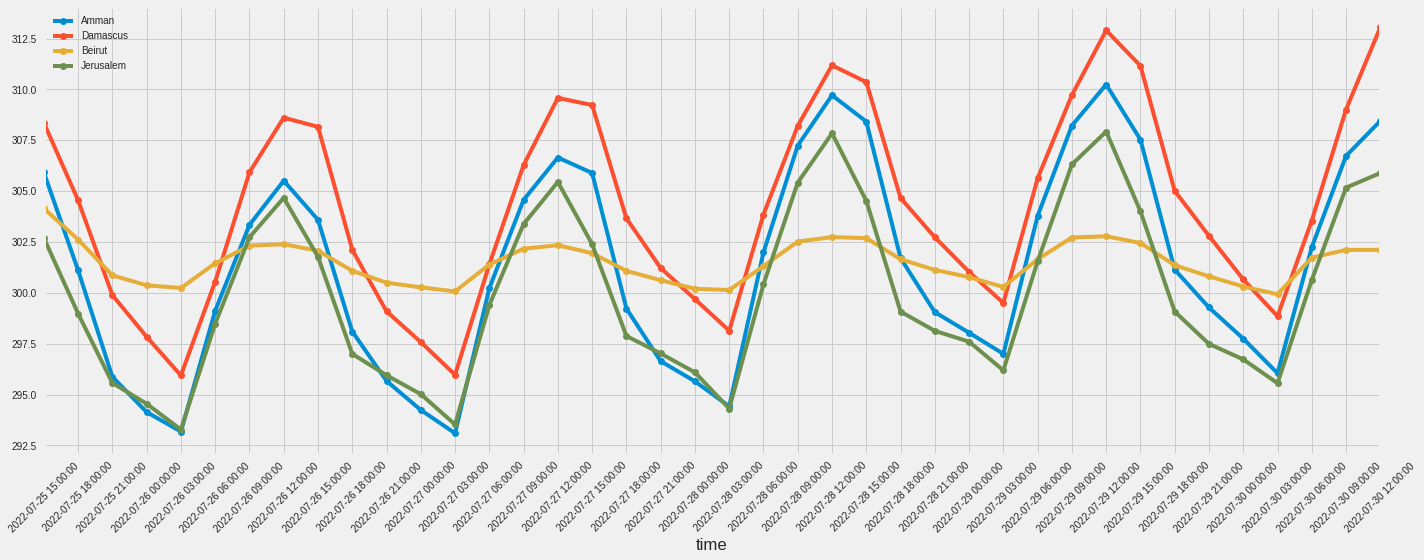

In [73]:
dataF.plot(figsize=(20,8),marker="o")
plt.xticks(dataF.index,dataF.index,rotation="45")
plt.tight_layout()
# ax.set_xticks(range(len(dataF.index)))
# ax.set_xticklabels(dataF.index)